In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kmeans.csv')

In [3]:
data.head()

,x1,x2
0,24.412,32.932
1,35.190,12.189
2,26.288,41.718
3,0.376,15.506
4,26.116,3.963


In [4]:
# Normalizing the data
def normalize(X):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_X = (data - mean) / std
    return normalized_X

data_normalized = normalize(data)

In [5]:
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return centroids, clusters

In [6]:
def initialize_centroids(data, k):
    np.random.seed(42)
    centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_indices]
    return centroids

def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        points = data[clusters == i]
        if len(points) > 0:
            new_centroids[i] = points.mean(axis=0)
        else:
            new_centroids[i] = np.random.rand(data.shape[1]) # Randomly reinitialize if no points assigned
    return new_centroids

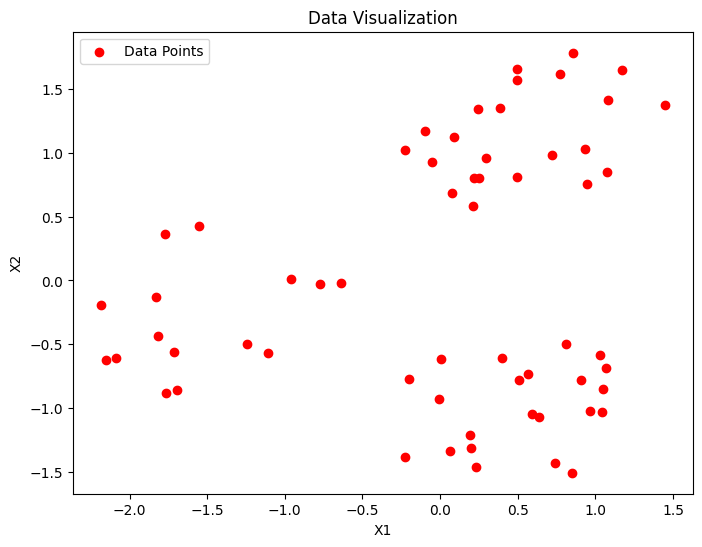

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data_normalized['x1'], data_normalized['x2'], c='red', label='Data Points')
plt.title('Data Visualization')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [8]:
# Running k-means for cluster 2 & 3
centroids_2, clusters_2 = kmeans(data_normalized.values, 2)
centroids_3, clusters_3 = kmeans(data_normalized.values, 3)

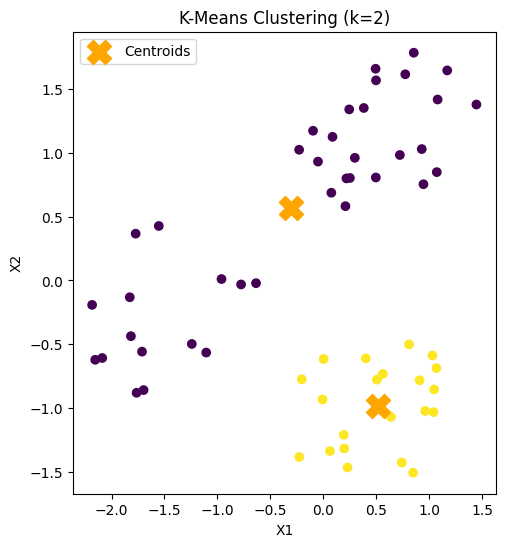

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_normalized['x1'], data_normalized['x2'], c=clusters_2, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], s=300, c='ORANGE', marker='X', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

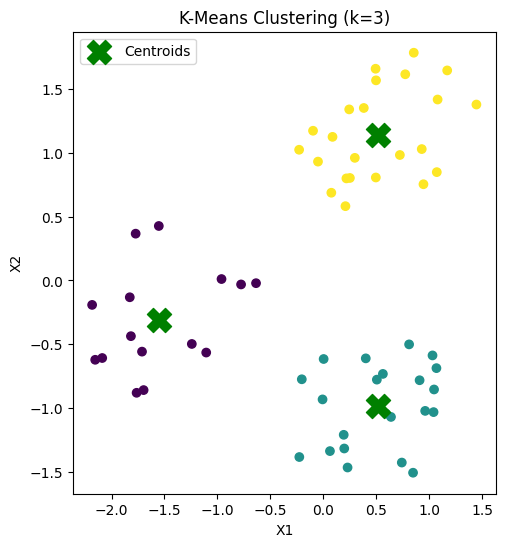

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(data_normalized['x1'], data_normalized['x2'], c=clusters_3, cmap='viridis')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], s=300, c='GREEN', marker='X', label='Centroids')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()